## Import lib.


In [32]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import statistics as stats

## Import csv

In [2]:
df = pd.read_csv('iris_dirty.csv', header = None) 
df.reset_index(drop=True, inplace=True)
df

,0,1,2,3,4
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,23 mm,Iris-virginica
147,6.3,2.5,5.0,19 mm,Iris-virginica
148,6.5,3.0,5.2,20 mm,Iris-virginica
149,6.2,3.4,5.4,23 mm,Iris-virginica


In [ ]:
# we can already see that the col names are not correct

## Change cols header

In [3]:
# change the cols headers
df.columns


Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [4]:
# list of new cols name
col_names = [ 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm', 'species']

In [5]:
#substituting the cols names
df.columns = col_names
df

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,2 mm,Iris-setosa
1,4.9,3.0,1.4,2 mm,Iris-setosa
2,4.7,3.2,1.3,2 mm,Iris-setosa
3,4.6,3.1,1.5,2 mm,Iris-setosa
4,5.0,3.6,1.4,2 mm,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,23 mm,Iris-virginica
147,6.3,2.5,5.0,19 mm,Iris-virginica
148,6.5,3.0,5.2,20 mm,Iris-virginica
149,6.2,3.4,5.4,23 mm,Iris-virginica


## Change petalwidth col type from object to float 64


In [6]:
df.dtypes

sepallengthcm    float64
sepalwidthcm     float64
petallengthcm    float64
petalwidthcm      object
species           object
dtype: object

In [7]:
df['petalwidthcm'] = df['petalwidthcm'].str.extract('(\d+)')
#extract using regex


In [8]:
df['petalwidthcm'] = df['petalwidthcm'].astype('float64')
#convert from obj to float 


In [9]:
df['petalwidthcm'] = df['petalwidthcm'].div(10)
#adapt the scale from mm to cm


In [10]:
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA - exploratory data analysis - get to know the data 

In [ ]:
#first I need to remove the 'mm' from the col obs.

In [ ]:
df.info()

In [ ]:
# i want to see the means etc 
df.describe()

In [ ]:
sns.distplot(df['5.1'], bins=20)
plt.show()

In [13]:
df['species'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        49
Iris-setsoa         1
Name: species, dtype: int64

## Clean Step

In [23]:
#replace the misspelling
df['species'].replace({'Iris-setsoa' : 'Iris-setosa'}, inplace=True)

In [24]:
df['species'].value_counts()

Iris-versicolor    51
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [28]:
#check for na's
missingdata=df.isna()
missingdata.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [35]:
#replace the missing value in spealwidthcm
df['sepalwidthcm'].fillna((df['sepalwidthcm'].mean()), inplace=True)

In [39]:
df.isna().sum()/len(df)

sepallengthcm    0.0
sepalwidthcm     0.0
petallengthcm    0.0
petalwidthcm     0.0
species          0.0
dtype: float64

## Plot Outliers and deal with these values

/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


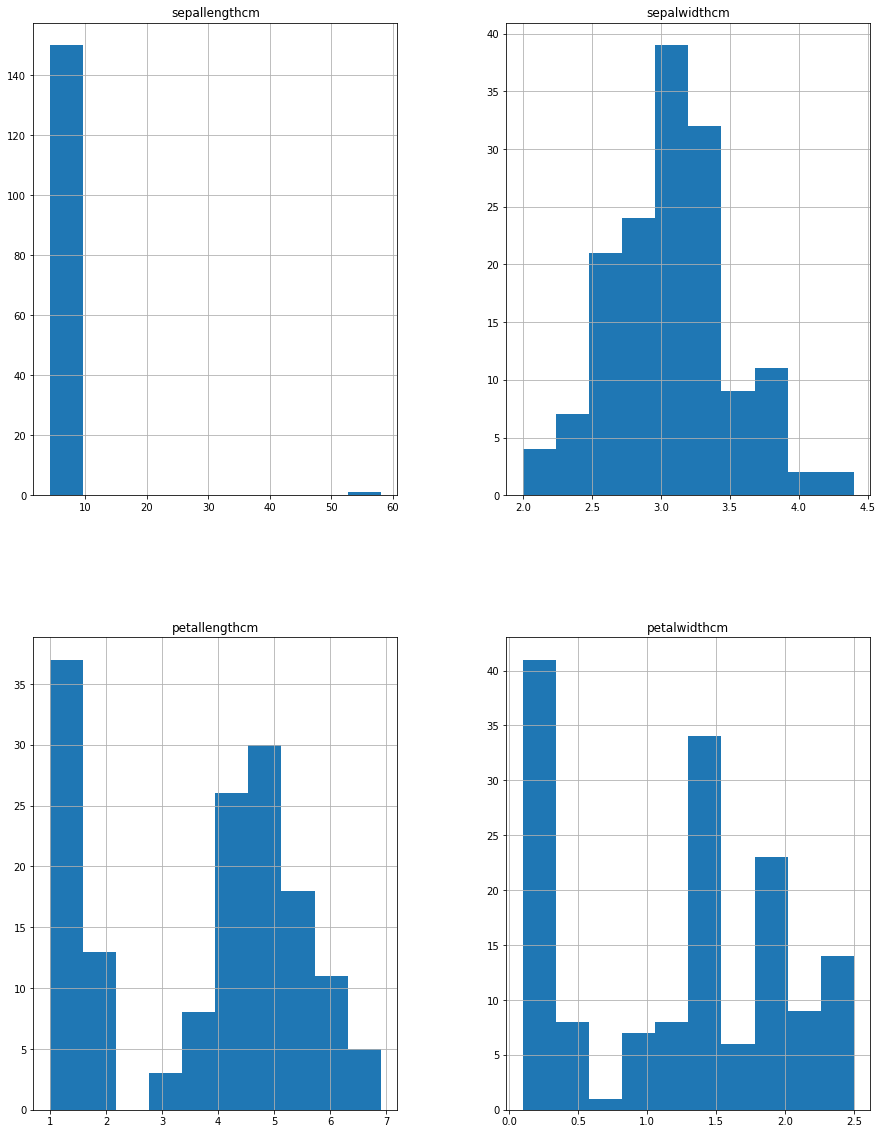

In [40]:
df.hist(figsize = (15,20));
plt.show()
#sepallength cm has outlier to remove

<AxesSubplot:xlabel='petallengthcm'>

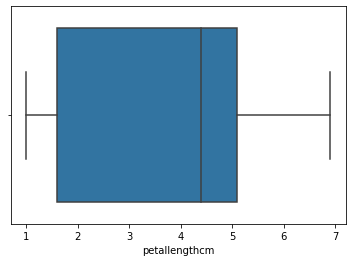

In [42]:
sns.boxplot(x=df['petallengthcm'])

/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


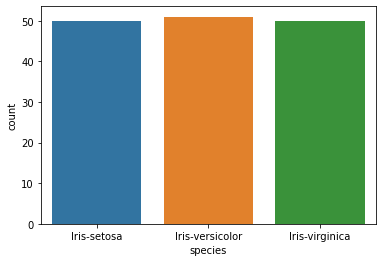

In [45]:
sns.countplot(df.species);

/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


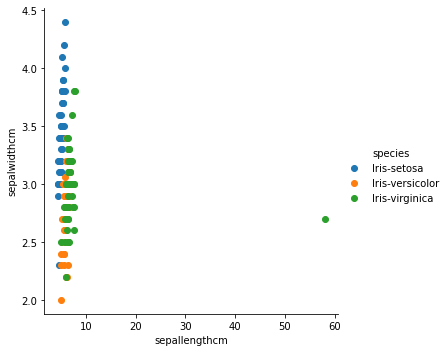

In [46]:
sns.FacetGrid(df, hue="species", size=5).map(plt.scatter, "sepallengthcm", "sepalwidthcm").add_legend();

/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update you

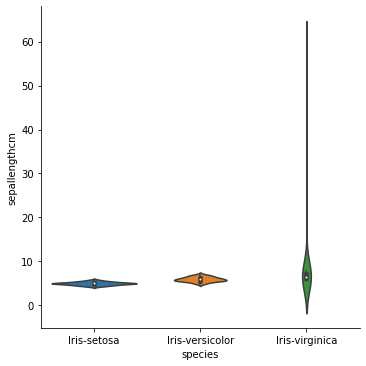

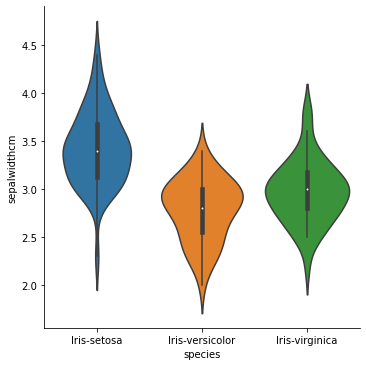

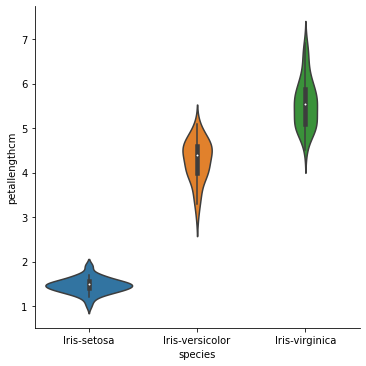

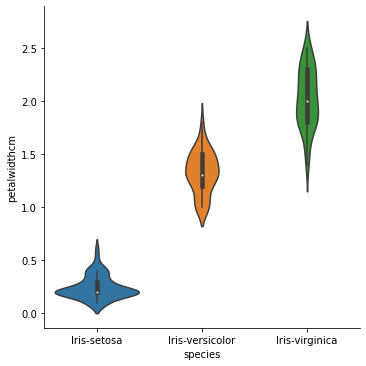

In [49]:
violincols=["sepallengthcm","sepalwidthcm","petallengthcm","petalwidthcm"]
for i in violincols:
    sns.factorplot(x="species",y=i,data=df,kind="violin");

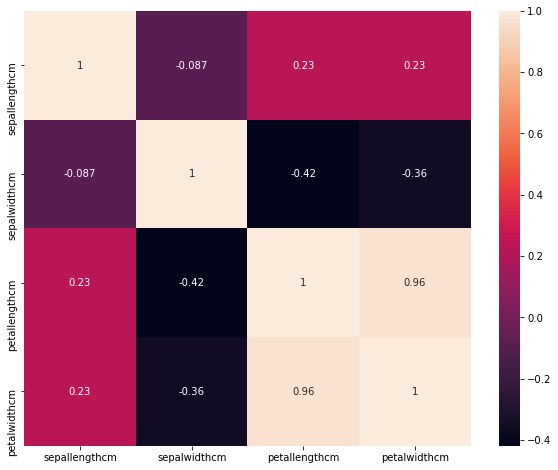

In [47]:
# check for multicollinearity 
corr_matrix=df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [50]:
# all expected multicollinearity

In [53]:
#removing the ouliers from sepallength
#remove outliers using calculated IQRs 
# first i define the percentiles

iqr = np.percentile(df['sepallengthcm'],75) - np.percentile(df['sepallengthcm'],25)
upper_limit = np.percentile(df['sepallengthcm'],75) + 1.5*iqr
lower_limit = np.percentile(df['sepallengthcm'],25) - 1.5*iqr

In [55]:
df = df[(df['sepallengthcm']>lower_limit) & (df['sepallengthcm']<upper_limit)]
df.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/Users/andreatognoli/opt/miniconda3/envs/excondables/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


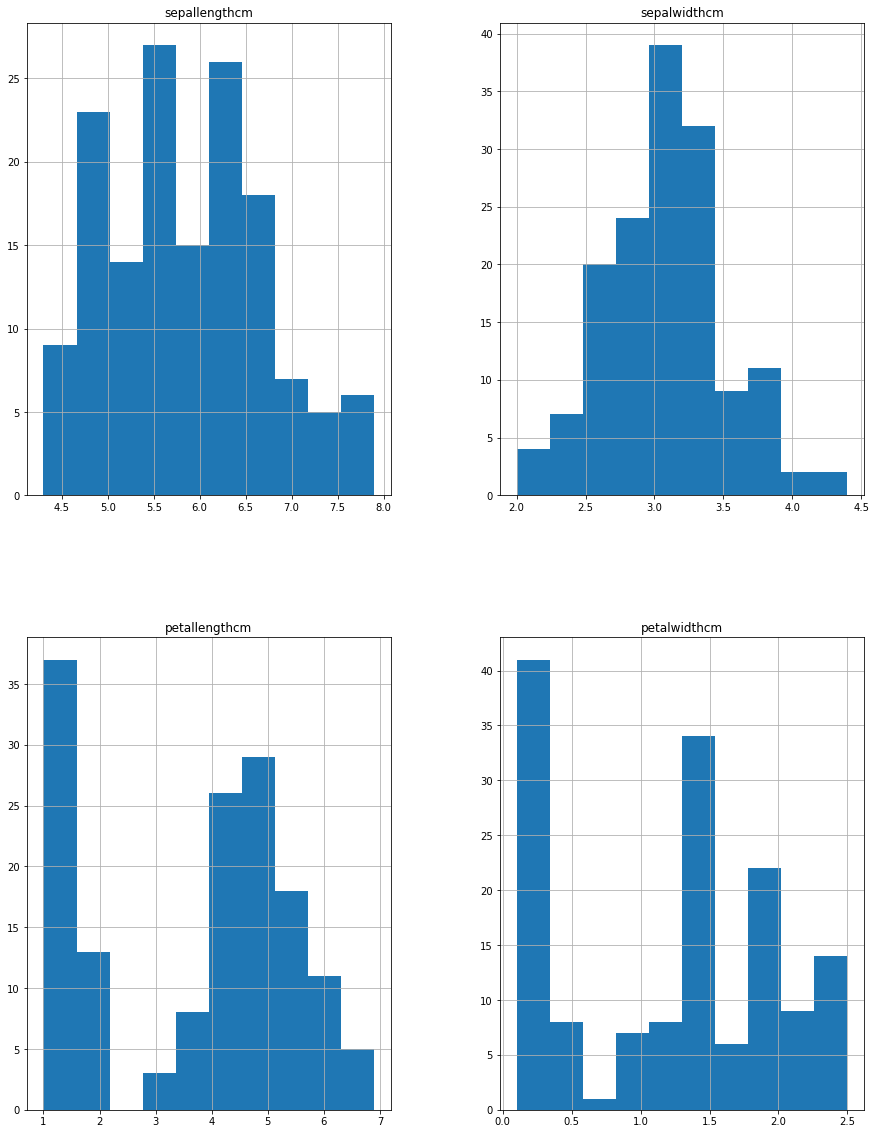

In [56]:
df.hist(figsize = (15,20));
plt.show()
#sepallength cm has outlier to remove

## Split the data into train and test¶


In [57]:
from sklearn.linear_model import LogisticRegression

In [64]:
#devide the target from the other dep. vars 
y= df['species']
X=df.drop(['species'],axis=1)


,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.45, random_state=40)

## apply model and train model 


In [76]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

## evaluate accuracy and test

In [77]:
from sklearn.metrics import accuracy_score 
predictions = classification.predict(X_test)

In [78]:
predictions

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-ve

In [79]:
accuracy_score(y_test, predictions)

1.0